In [1]:
import math

import pandas as pd
from matplotlib import pyplot as plt
from opinionmining import *

In [2]:
paths = []
for folder in os.listdir(full_path):
    try:
        for file in os.listdir(os.path.join(full_path, folder)):
            if str(file) != "Readme.txt" and str(file) != ".DS_Store":
                paths.append(os.path.join(full_path, folder, file))
    except NotADirectoryError:
        continue
paths[:3]

['/Users/jossinger/Dropbox/Studies/Bath_Artificial_Intelligence/Course Material/6_NLP/Programming/Submission/data/Reviews-9-products/norton.txt',
 '/Users/jossinger/Dropbox/Studies/Bath_Artificial_Intelligence/Course Material/6_NLP/Programming/Submission/data/Reviews-9-products/Nokia 6600.txt',
 '/Users/jossinger/Dropbox/Studies/Bath_Artificial_Intelligence/Course Material/6_NLP/Programming/Submission/data/Reviews-9-products/Hitachi router.txt']

In [3]:
SAVE = False
pwd = os.getcwd()
filename = "db.csv"
if SAVE:
    db = ReviewDatabase(paths).dataframe.to_csv(os.path.join(pwd, filename))
else:
    db = pd.read_csv(filename)

database = db.where(db["Product_ID"] == 1).copy().dropna()


In [4]:
database.Sentence

0      I have read the installation instructions for ...
1      Why is it that I can install any other type of...
2      But if I installed either one of these Norton ...
3      It can not be the computer or the owner, since...
4      I have used Norton for the past 5 years and fo...
                             ...                        
373    Of course, if you try to reach Symantec custom...
374    Meanwhile, the damn alert is still popping up ...
375    Finally I ran msconfig and went into the "serv...
376    This time, it started the uninstallation proce...
377    I simply hate Symantec. I swear, if I could ha...
Name: Sentence, Length: 378, dtype: object

In [5]:

database["ExtractedCategories"] = pd.Series(map(lambda x: FeatureExtraction.categories(x), database.Sentence))


What is the product?
What are the opinion categories?
What is the sentiment of the opinion categories?

In [6]:
review_1 = database.where(database["Product_ID"] == 1)
review_1

,Unnamed: 0,Product_ID,Review_ID,Sentence_ID,Sentence,gt_categories,gt_score,ExtractedCategories
0,0.0,1.0,1.0,1.0,I have read the installation instructions for ...,"('software',)","(-3,)","[installation instructions, nis, installation,..."
1,1.0,1.0,1.0,2.0,Why is it that I can install any other type of...,"('no sentiment',)","(0,)","[type, software]"
2,2.0,1.0,1.0,3.0,But if I installed either one of these Norton ...,"('norton products',)","(-3,)","[norton products, installation]"
3,3.0,1.0,1.0,4.0,"It can not be the computer or the owner, since...","('mcafee anti-virus 8',)","(2,)","[computer, owner, virus, problems]"
4,4.0,1.0,1.0,5.0,I have used Norton for the past 5 years and fo...,"('norton',)","(-2,)","[norton, past years, years, software]"
...,...,...,...,...,...,...,...,...
373,373.0,1.0,45.0,374.0,"Of course, if you try to reach Symantec custom...","('symantec customer service',)","(-3,)","[course, symantec customer service, useless au..."
374,374.0,1.0,45.0,375.0,"Meanwhile, the damn alert is still popping up ...","('no sentiment',)","(0,)","[damn alert, seconds]"
375,375.0,1.0,45.0,376.0,"Finally I ran msconfig and went into the ""serv...","('no sentiment',)","(0,)","[msconfig, services tab, norton symantec servi..."
376,376.0,1.0,45.0,377.0,"This time, it started the uninstallation proce...","('uninstallation',)","(-1,)","[uninstallation process, work]"


In [7]:
#Create a copy of the database to perform feature extraction
category_table = database.loc[:,"Product_ID":"Sentence_ID"].copy()
# Perform Stemming on the sentences
category_table["Stemmed_Sentence"] = pd.Series(map(lambda x: FeatureExtraction.stemming([x])[0], database.Sentence))
# Remove the stop words
category_table["Stemmed_Sentence"] = pd.Series(map(lambda x: FeatureExtraction.remove_stop([x])[0], category_table["Stemmed_Sentence"]))
category_table["ExtractedCategories"] = database["ExtractedCategories"]
category_table["Stemmed"] = pd.Series(map(lambda x : FeatureExtraction.stemming(x), category_table["ExtractedCategories"]))
display(category_table)
# Flatten the stemmed categories into a list and then count the frequencies of each category
flattened_list =  [category for category_set in category_table["Stemmed"] for category in category_set]
counter = Counter(flattened_list)
counts = [c for p, c in counter.most_common()]
topics = [p for p, c in counter.most_common()]
# counts
counter.most_common(10)


,Product_ID,Review_ID,Sentence_ID,Stemmed_Sentence,ExtractedCategories,Stemmed
0,1.0,1.0,1.0,read instal instruct nis nav prior instal end ...,"[installation instructions, nis, installation,...","[instal instruct, nis, instal, result, junk so..."
1,1.0,1.0,2.0,whi instal ani type softwar instal work proper,"[type, software]","[type, softwar]"
2,1.0,1.0,3.0,instal norton product work instal,"[norton products, installation]","[norton product, instal]"
3,1.0,1.0,4.0,comput owner sinc purchas mcafe anti virus ins...,"[computer, owner, virus, problems]","[comput, owner, virus, problem]"
4,1.0,1.0,5.0,use norton past year year softwar gotten disgrac,"[norton, past years, years, software]","[norton, past year, year, softwar]"
...,...,...,...,...,...,...
373,1.0,45.0,374.0,cours tri reach symantec custom servic useless...,"[course, symantec customer service, useless au...","[cours, symantec custom servic, useless autom ..."
374,1.0,45.0,375.0,meanwhil damn alert pop everi second,"[damn alert, seconds]","[damn alert, second]"
375,1.0,45.0,376.0,final ran msconfig went servic tab uncheck eve...,"[msconfig, services tab, norton symantec servi...","[msconfig, servic tab, norton symantec servic,..."
376,1.0,45.0,377.0,time start uninstal process left work think wo...,"[uninstallation process, work]","[uninstal process, work]"


[('problem', 29),
 ('norton', 27),
 ('product', 27),
 ('comput', 24),
 ('nis', 19),
 ('program', 17),
 ('version', 15),
 ('internet secur', 14),
 ('time', 12),
 ('firewal', 12)]

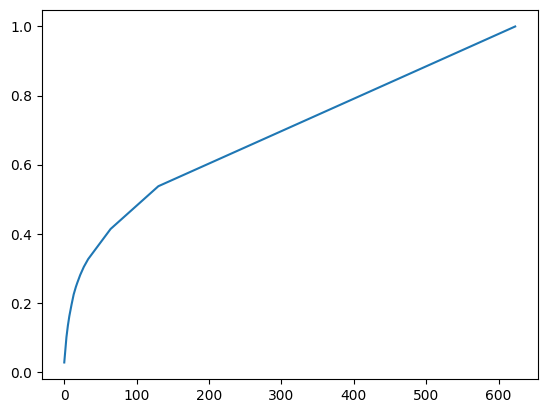

In [8]:
df = pd.DataFrame(counts, columns=["Count"])
df["topics"] = pd.Series(topics)
df["c_frqncy"] = df["Count"].cumsum()
df["cfd"] = (df["c_frqncy"] / df["c_frqncy"].max())
plt.plot(df["cfd"])


In [9]:
threshold = 0.33
significant_topics = df.where(df["cfd"] < threshold).dropna()
searchable_topics = significant_topics["topics"]
searchable_topics

0                   problem
1                    norton
2                   product
3                    comput
4                       nis
5                   program
6                   version
7            internet secur
8                      time
9                   firewal
10                  softwar
11                   review
12    norton internet secur
13                   instal
14           norton product
15                   system
16                    first
17                antivirus
18                    virus
19                    peopl
20                      lot
21                 symantec
22                    minut
23                     year
24               systemwork
25                   window
26                     cost
27                     site
28                     hour
29                    updat
30         previous version
31                 registri
32         norton antivirus
33              new version
34                    error
Name: topics, dtype:

In [10]:
from nltk.metrics import distance
def fuzzymatch(target_words, test_word):
    for target_word in target_words:
        if distance.edit_distance(test_word, target_word) <= 1:
            return target_word
    return None
    
fuzzymatch(searchable_topics, "uninstal")

        

In [11]:
# search through the original words to retrieve the keywords associated to the stem in a new
def fuzzy_match_categories(test_categories, target_categories):
    matched_categories = []
    for word in test_categories:
        match = fuzzymatch(target_categories, word)
        if match:
            matched_categories.append(match)
    return matched_categories
        
category_table["fuzzymatched_topics"] = pd.Series(map(lambda x: fuzzy_match_categories(x, searchable_topics), category_table.Stemmed))
        

In [12]:
category_table

,Product_ID,Review_ID,Sentence_ID,Stemmed_Sentence,ExtractedCategories,Stemmed,fuzzymatched_topics
0,1.0,1.0,1.0,read instal instruct nis nav prior instal end ...,"[installation instructions, nis, installation,...","[instal instruct, nis, instal, result, junk so...","[nis, instal]"
1,1.0,1.0,2.0,whi instal ani type softwar instal work proper,"[type, software]","[type, softwar]",[softwar]
2,1.0,1.0,3.0,instal norton product work instal,"[norton products, installation]","[norton product, instal]","[norton product, instal]"
3,1.0,1.0,4.0,comput owner sinc purchas mcafe anti virus ins...,"[computer, owner, virus, problems]","[comput, owner, virus, problem]","[comput, virus, problem]"
4,1.0,1.0,5.0,use norton past year year softwar gotten disgrac,"[norton, past years, years, software]","[norton, past year, year, softwar]","[norton, year, softwar]"
...,...,...,...,...,...,...,...
373,1.0,45.0,374.0,cours tri reach symantec custom servic useless...,"[course, symantec customer service, useless au...","[cours, symantec custom servic, useless autom ...",[]
374,1.0,45.0,375.0,meanwhil damn alert pop everi second,"[damn alert, seconds]","[damn alert, second]",[]
375,1.0,45.0,376.0,final ran msconfig went servic tab uncheck eve...,"[msconfig, services tab, norton symantec servi...","[msconfig, servic tab, norton symantec servic,...",[]
376,1.0,45.0,377.0,time start uninstal process left work think wo...,"[uninstallation process, work]","[uninstal process, work]",[]


The difficulty here is in mapping between effectively a many to one (through the process of stemming) to a one to one, where each category can be read as the most common form of that category.  

In [13]:
def jaro_similarity(target_words, test_word):
    for target_word in target_words:
        if distance.jaro_similarity(target_word, test_word) > 0.8:
            return target_word
    return None

print(category_table["fuzzymatched_topics"])
    
    

0                 [nis, instal]
1                     [softwar]
2      [norton product, instal]
3      [comput, virus, problem]
4       [norton, year, softwar]
                 ...           
373                          []
374                          []
375                          []
376                          []
377           [softwar, comput]
Name: fuzzymatched_topics, Length: 378, dtype: object


Use unsupervised learning to match stemmed review topics to broader content topics
- do this by vectorizing the 

In [14]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vocabulary = category_table.Stemmed_Sentence.to_numpy().flatten()
# 
# # Applying KMeans
# kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
# 
# # Predicting the clusters
# labels = kmeans.predict(X)
# 
# # Plotting
# plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
# plt.show()

In [15]:
vocabulary

array(['read instal instruct nis nav prior instal end result junk softwar',
       'whi instal ani type softwar instal work proper',
       'instal norton product work instal',
       'comput owner sinc purchas mcafe anti virus instal work fine problem',
       'use norton past year year softwar gotten disgrac',
       'glad work norton', 'use norton product past familiar',
       'bought nis recent tri', 'attempt instal final given',
       'thank roxio goback use time',
       'dure instal nis freez reboot proper ask',
       'ms scandisk appear manual shutdown onli scan 2nd bar over(up hr shut use goback',
       'time instal work error use unistal nis icon proper remov',
       'problem ani softwar comput', 'nis work like charm year',
       'past norton custom consid slap face',
       'buy softwar instal normal posit non work comput',
       'norton downhil slid recent product fallen cliff',
       'loyal custom norton symantec product purchas internet secur softwar firewal ani d